In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA, FastICA
import seaborn as sns
%matplotlib inline


In [2]:
cancer = load_breast_cancer()

X = scale(cancer.data)
y = pd.DataFrame(cancer.target)
variable_names = cancer.feature_names
X[0:2,0:2].shape

(2L, 2L)

In [3]:
ica = FastICA(n_components=6).fit(X)
#print ica.explained_variance_ratio_
first_pc = ica.components_[0]
second_pc = ica.components_[1]
transformed_data = ica.transform(X)

print "first: ", first_pc
print "second: ", second_pc
print "og shape: ", X.shape
print "transformed size: ", transformed_data.shape

first:  [ -5.98670919e-05   1.50234304e-03   4.58656747e-05  -5.35321633e-04
  -3.35350803e-03   1.62832364e-03   4.43010954e-04  -1.00747885e-04
   1.51035572e-02  -8.92660585e-04   3.75912043e-05   1.54488142e-03
   6.67745239e-04  -8.60371759e-04  -7.83135396e-03   1.00559745e-03
  -5.31979046e-04  -2.17012160e-03   1.70168934e-02  -2.85338693e-03
   1.22059531e-04   1.92331012e-03   4.24638331e-04  -5.50134067e-04
  -5.37021514e-03   3.11543611e-03   1.48709077e-03   4.29764567e-04
   1.94564881e-02  -1.39382124e-04]
second:  [  3.41458533e-03  -3.45104661e-03   3.15906412e-03   2.48577084e-03
  -1.35837910e-02  -1.96468412e-03   2.12540385e-04  -1.58415488e-03
   1.88967515e-04  -7.17347950e-03  -2.31541007e-03  -6.78694935e-03
  -1.40777709e-03  -1.57936363e-03  -1.35484683e-02   2.91646296e-03
   4.39762226e-03   8.34162579e-04   3.51068226e-03  -2.15626038e-04
   2.09784012e-03  -4.66752455e-03   2.23670330e-03   1.18698808e-03
  -1.47583808e-02   1.06016441e-03   2.23163574e-0

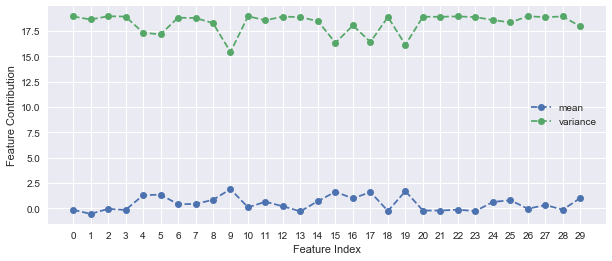

In [5]:
# # https://www.kaggle.com/georgiost77/breast-cancer-machine-learning-prediction
features = scale(cancer.data)
ica = FastICA(30)
projected = ica.fit_transform(features)
projected /= projected.std(axis=0)
ica_inversed_data = ica.inverse_transform(np.eye(30))

plt.style.use('seaborn')

def plot_ica():
    plt.figure(figsize=(10, 4))
    plt.plot(ica_inversed_data.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(ica_inversed_data.std(axis=0)), '--o', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 30, 1.0))
    plt.show()

    #plt.figure(figsize = (10, 4))
    #plt.plot(np.cumsum(ica.explained_variance_ratio_), '--o')
    #plt.xlabel('Principal Component')
    #plt.ylabel('Cumulative Explained Variance')
    #plt.xticks(np.arange(0, 30, 1.0))
    #plt.show()
    
plot_ica()

In [ ]:
#emc2_image_ica = ica.fit_transform(emc2_image)
#emc2_restored = ica.inverse_transform(emc2_image_ica)
 

In [10]:
from scipy.stats import kurtosis
print kurtosis(ica_inversed_data).mean()
print kurtosis(projected).mean()
print kurtosis(X).mean()

1.60449610485
34.0300027902
7.73570701104


In [9]:
image = pd.read_csv('C:/Users/443966/github/7641_ML/A3 - Unsupervised Learning and Dimensionality Reduction/datasets/image_segmentation_1.csv')


X = image[image.columns.difference(['CLASS'])]
y = image['CLASS']
y_list = y.values.flatten()
X[0:2]

#X = scale(cancer.data)
#y = pd.DataFrame(cancer.target)
variable_names = list(image.columns.values)
print 
print variable_names


['CLASS', 'REGION-CENTROID-COL', 'REGION-CENTROID-ROW', 'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-5', 'SHORT-LINE-DENSITY-2', 'VEDGE-MEAN', 'VEDGE-SD', 'HEDGE-MEAN', 'HEDGE-SD', 'INTENSITY-MEAN', 'RAWRED-MEAN', 'RAWBLUE-MEAN', 'RAWGREEN-MEAN', 'EXRED-MEAN', 'EXBLUE-MEAN', 'EXGREEN-MEAN', 'VALUE-MEAN', 'SATURATION-MEAN', 'HUE-MEAN']


In [10]:
ica = FastICA(n_components=6).fit(X)
#print ica.explained_variance_ratio_
first_pc = ica.components_[0]
second_pc = ica.components_[1]
transformed_data = ica.transform(X)

print "first: ", first_pc
print "second: ", second_pc
print "transformed size: ", transformed_data.shape

first:  [ -5.68849263e-06   8.93872463e-06  -3.25023286e-06  -8.68770521e-06
  -2.31064202e-04   1.30875484e-06   1.45793356e-06  -4.38230670e-07
   4.43750612e-06   3.74519828e-07   1.52466140e-06   2.33532286e-06
   0.00000000e+00   5.32447220e-08  -4.22248605e-09   4.02593660e-09
   1.74279568e-06   2.11778136e-05   6.23496377e-04]
second:  [  4.89639115e-05  -3.67901909e-05  -1.21737205e-05   1.82510194e-06
  -1.59267729e-05  -3.63979612e-06   4.03398299e-06   2.03552864e-05
  -8.22941445e-06  -2.39245755e-08  -2.85264290e-04   7.92482162e-06
   0.00000000e+00   7.04930036e-08   1.29518901e-08   6.38867474e-09
   1.50235247e-05   3.03864930e-06   2.63406839e-05]
transformed size:  (2310L, 6L)


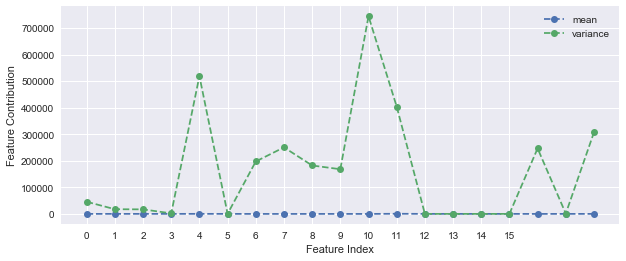

In [13]:
# # https://www.kaggle.com/georgiost77/breast-cancer-machine-learning-prediction
features = image[image.columns.difference(['CLASS'])]
ica = FastICA(15, max_iter=1000).fit(features)
#projected = ica.fit_transform(features)
#projected /= projected.std(axis=0)
ica_inversed_data = ica.inverse_transform(np.eye(15))
#ica_inversed_data /= ica_inversed_data.std(axis=0)

plt.style.use('seaborn')

def plot_ica():
    plt.figure(figsize=(10, 4))
    plt.plot(ica_inversed_data.mean(axis=0), '--o', label = 'mean')
    plt.plot(np.square(ica_inversed_data.std(axis=0)), '--o', label = 'variance')
    plt.ylabel('Feature Contribution')
    plt.xlabel('Feature Index')
    plt.legend(loc='best')
    plt.xticks(np.arange(0, 16, 1.0))
    plt.show()

    #plt.figure(figsize = (10, 4))
    #plt.plot(np.cumsum(ica.explained_variance_ratio_), '--o')
    #plt.xlabel('Principal Component')
    #plt.ylabel('Cumulative Explained Variance')
    #plt.xticks(np.arange(0, 30, 1.0))
    #plt.show()
    
plot_ica()